# Seasonal Autoregressive Integrated Moving Averages- SARIMA(p,d,q)(P,D,Q)m

ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an additional set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. and $m$ represents the number of data points (rows) in each seasonal cycle.

## Perform standard imports and load datasets

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('res/WTI monthly.csv')
df= df.dropna()
df.index = pd.DatetimeIndex(df['Date'])
df.index.freq = 'MS'

In [9]:
df.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
Date,,
1986-01-01,Jan-1986,22.93
1986-02-01,Feb-1986,15.46
1986-03-01,Mar-1986,12.61
1986-04-01,Apr-1986,12.84
1986-05-01,May-1986,15.38


### Plot the WTI Spot Price data

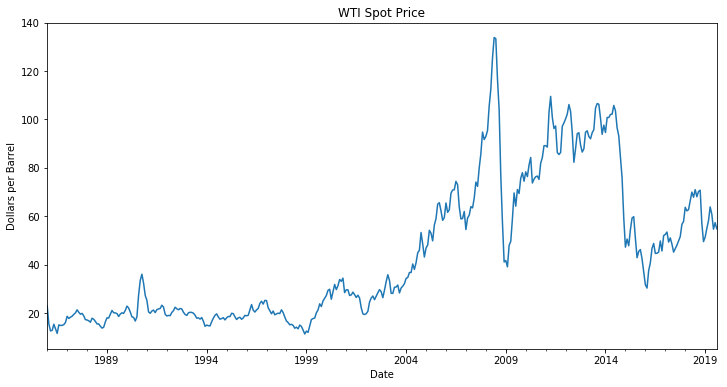

In [10]:
title = 'WTI Spot Price'
ylabel='Dollars per Barrel'

ax = df['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

### Run an ETS Decomposition

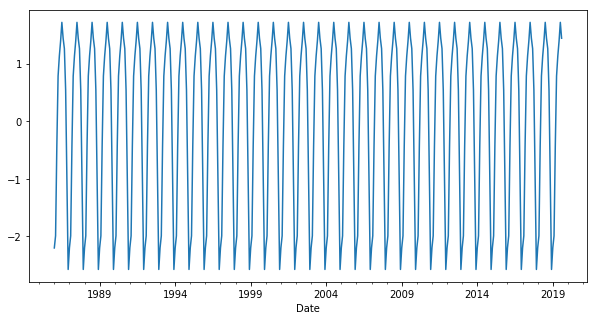

In [33]:
result = seasonal_decompose(df['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], model='add')
result.seasonal.plot(figsize=(10,5));

### Run pmdarima.auto_arima to obtain recommended orders

In [12]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  404
Model:             SARIMAX(2, 1, 2)x(2, 0, 0, 12)   Log Likelihood               -1118.253
Date:                            Mon, 09 Dec 2019   AIC                           2252.506
Time:                                    15:50:50   BIC                           2284.498
Sample:                                         0   HQIC                          2265.172
                                            - 404                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0085      0.015      0.564      0.573      -0.021       0.038
ar.L1          1.5426      0.061     25.097      0.000       1.422       1.663
ar.L2         -0.6355      0.061    -10.459      0.000      -0.755      -0.516
ma.L1         -1.1965      0.088    -13.642      0.000      -1.368      -1.025
ma.L2          0.2671      0.088      3.051      0.002       0.096       0.439
ar.S.L12       0.1007      0.040      2.504      0.012       0.022       0.180
ar.S.L24      -0.1392      0.044     -3.171      0.002      -0.225      -0.053
sigma2        15.0204      0.707     21.240      0.000      13.634      16.406
===================================================================================
Ljung-Box (Q):                       30.57   Jarque-Bera (JB):               199.38
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              11.17   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This provides an ARIMA Order of (2, 1, 2) combined with a seasonal order of (2, 0, 0, 12).

### Split the data into train/test sets

In [13]:
len(df)

404

In [15]:
# Set one year for testing
train = df.iloc[:-12]
test = df.iloc[len(df)-12:]

### Fit a SARIMA(2, 1, 2)(2, 0, 0, 12) Model

In [16]:
model = SARIMAX(train['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'],order=(2,1,2),seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            Statespace Model Results                                           
===============================================================================================================
Dep. Variable:     Cushing, OK WTI Spot Price FOB (Dollars per Barrel)   No. Observations:                  392
Model:                                  SARIMAX(2, 1, 2)x(2, 0, 0, 12)   Log Likelihood               -1077.851
Date:                                                 Mon, 09 Dec 2019   AIC                           2169.702
Time:                                                         15:53:26   BIC                           2197.483
Sample:                                                     01-01-1986   HQIC                          2180.714
                                                          - 08-01-2018                                         
Covariance Type:                                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5690      0.058     27.042      0.000       1.455       1.683
ar.L2         -0.6626      0.057    -11.692      0.000      -0.774      -0.552
ma.L1         -1.2116      0.083    -14.531      0.000      -1.375      -1.048
ma.L2          0.2884      0.082      3.520      0.000       0.128       0.449
ar.S.L12       0.1037      0.040      2.590      0.010       0.025       0.182
ar.S.L24      -0.1656      0.044     -3.738      0.000      -0.252      -0.079
sigma2        14.4759      0.687     21.079      0.000      13.130      15.822
===================================================================================
Ljung-Box (Q):                       37.25   Jarque-Bera (JB):               189.06
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              11.37   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,2)(2,0,0,12) Predictions')

In [27]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'][i]}")

predicted=66.36549029532438, expected=70.23
predicted=64.12239614000437, expected=70.75
predicted=63.91290255774817, expected=56.96
predicted=61.87737646539312, expected=49.52
predicted=61.57511272602909, expected=51.38
predicted=60.72038721447515, expected=54.95
predicted=61.149714200260284, expected=58.15
predicted=61.104166343960586, expected=63.86
predicted=61.92729232496225, expected=60.83
predicted=62.35154097447371, expected=54.66
predicted=62.579646196775116, expected=57.35
predicted=62.20787096659943, expected=54.81


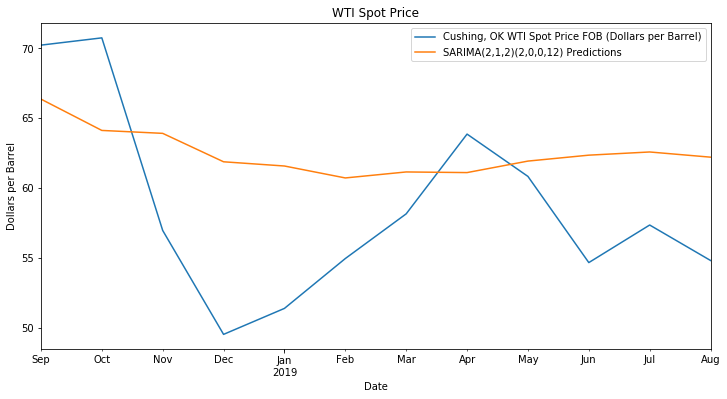

In [20]:
# Plot predictions against known values
title = 'WTI Spot Price'
ylabel='Dollars per Barrel'

ax = test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

### Evaluate the Model

In [28]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], predictions)
print(f'SARIMA(2,1,2)(2,0,0,12) MSE Error: {error}')

SARIMA(2,1,2)(2,0,0,12) MSE Error: 46.348276581858606


In [29]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], predictions)
print(f'SARIMA(2,1,2)(2,0,0,12) RMSE Error: {error}')

SARIMA(2,1,2)(2,0,0,12) RMSE Error: 6.807956858107916


In [30]:
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].mean()

58.62083333333334

### Retrain the model on the full data, and forecast the future

In [25]:
model = SARIMAX(df['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'],order=(2,1,2),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(2,1,2)(2,0,0,12) Forecast')

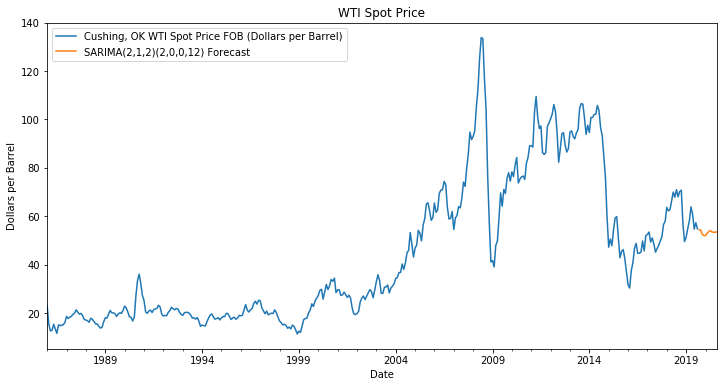

In [26]:
# Plot predictions against known values
title = 'WTI Spot Price'
ylabel='Dollars per Barrel'

ax = df['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

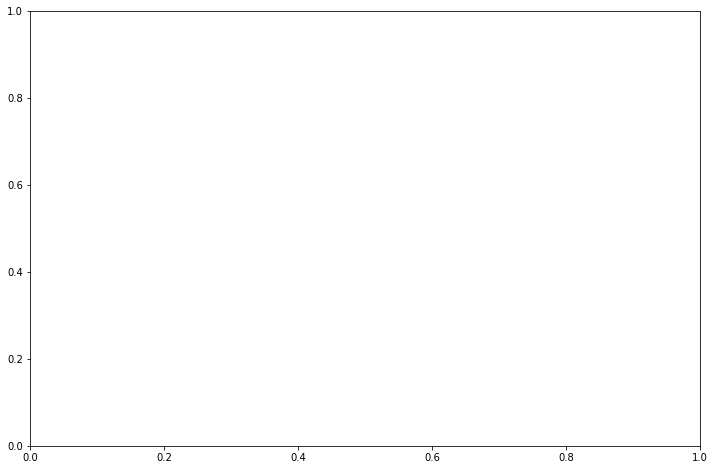

In [37]:
import matplotlib.pyplot as plt
init_1 = 2
end_1 = len(df['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])+11
fig, ax = plt.subplots(figsize=(12,8))
results.plot_predict(init_1,end_1,dynamic=False,plot_insample=True,ax=ax)
ax.set_title('WTI Spot Price',fontsize=24)
plt.show()